## The aim of this project is to analyse trends resulting from growing prosperity of different countries.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
%matplotlib inline


In [3]:
# Read in the datasets
# GDP by Purchasing Power Parity (PPP)
df_gdp = pd.read_csv("total_gdp_ppp_inflation_adjusted.csv")
# Citizen Income Per Capita $ Purchasing Power Parity (PPP)
df_income = pd.read_csv("income_per_person_gdppercapita_ppp_inflation_adjusted.csv")
# Electricity consumption per person
df_electricity = pd.read_csv("electricity_use_per_person.csv")
# Number of cellphones owned per 100 people
df_cellphones = pd.read_csv("cell_phones_per_100_people.csv")
# % of internet users by country
df_internet = pd.read_csv("internet_users.csv")
# Total annual oil consumption per country
df_oil = pd.read_csv("oil_consumption_total.csv")

In [15]:
df_gdp.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,...,2.890000e+10,3.240000e+10,3.390000e+10,3.850000e+10,3.950000e+10,4.750000e+10,5.130000e+10,5.490000e+10,6.300000e+10,6.580000e+10
1,Albania,3.260000e+08,3.270000e+08,3.280000e+08,3.300000e+08,3.310000e+08,3.320000e+08,3.340000e+08,3.350000e+08,3.370000e+08,...,2.110000e+10,2.230000e+10,2.350000e+10,2.490000e+10,2.670000e+10,2.760000e+10,2.850000e+10,2.930000e+10,3.010000e+10,3.070000e+10
2,Algeria,3.810000e+09,3.820000e+09,3.830000e+09,3.850000e+09,3.860000e+09,3.870000e+09,3.890000e+09,3.900000e+09,3.920000e+09,...,3.720000e+11,3.920000e+11,3.990000e+11,4.130000e+11,4.210000e+11,4.280000e+11,4.430000e+11,4.540000e+11,4.650000e+11,4.790000e+11
3,Andorra,3.340000e+06,3.350000e+06,3.360000e+06,3.360000e+06,3.370000e+06,3.370000e+06,3.380000e+06,3.380000e+06,3.390000e+06,...,2.820000e+09,3.040000e+09,3.190000e+09,3.190000e+09,3.060000e+09,2.900000e+09,2.810000e+09,2.730000e+09,NaN,NaN
4,Angola,1.020000e+09,1.020000e+09,1.030000e+09,1.030000e+09,1.040000e+09,1.040000e+09,1.050000e+09,1.050000e+09,1.050000e+09,...,6.310000e+10,7.610000e+10,9.020000e+10,1.110000e+11,1.270000e+11,1.300000e+11,1.340000e+11,1.390000e+11,1.460000e+11,1.520000e+11


### It was observed that some countries and years has missing data. This could be attributed to the fact that data was either not available, or collected for a particular country in a year. Melft function will be used to turn data into a more analysable.

In [16]:
# Using Melt to reshape the data to show country in the first column, followed by the year and GDP
df_gdp2 = pd.melt(df_gdp, id_vars="country", var_name="year", value_name="gdp")
df_gdp2

,country,year,gdp
0,Afghanistan,1800,2.080000e+09
1,Albania,1800,3.260000e+08
2,Algeria,1800,3.810000e+09
3,Andorra,1800,3.340000e+06
4,Angola,1800,1.020000e+09
...,...,...,...
41511,Venezuela,2013,5.320000e+11
41512,Vietnam,2013,4.650000e+11
41513,Yemen,2013,1.090000e+11
41514,Zambia,2013,4.400000e+10


In [17]:
# the Income Per Capita (in PPP)
# Using Melt to reshape the data to show country in the first column, followed by the year and income
df_income2 = pd.melt(df_income, id_vars="country", var_name="year", value_name="income")
df_income2

,country,year,income
0,Afghanistan,1800,603
1,Albania,1800,667
2,Algeria,1800,715
3,Andorra,1800,1200
4,Angola,1800,618
...,...,...,...
46508,Venezuela,2040,9880
46509,Vietnam,2040,14400
46510,Yemen,2040,3870
46511,Zambia,2040,4180


In [18]:
# electricity use Per Person
# Using Melt to reshape the data to show country in the first column, followed by the year and electricity consumption
df_electricity2 = pd.melt(df_electricity, id_vars="country", var_name="year", value_name="electricity_consumption")
df_electricity2

,country,year,electricity_consumption
0,Albania,1960,NaN
1,Algeria,1960,NaN
2,Angola,1960,NaN
3,Argentina,1960,NaN
4,Armenia,1960,NaN
...,...,...,...
7585,Venezuela,2014,2720.0
7586,Vietnam,2014,1420.0
7587,Yemen,2014,220.0
7588,Zambia,2014,717.0


In [36]:
# the number of Cell Phone subscription
# Using Melt to reshape the data
df_cellphones2 = pd.melt(df_cellphones, id_vars="country", var_name="year", value_name="no_of_cellphones")
df_cellphones2

,country,year,no_of_cellphones
0,Afghanistan,1960,0.0
1,Albania,1960,0.0
2,Algeria,1960,0.0
3,Andorra,1960,0.0
4,Angola,1960,0.0
...,...,...,...
11441,Venezuela,2018,71.8
11442,Vietnam,2018,147.0
11443,Yemen,2018,53.7
11444,Zambia,2018,89.2


In [20]:
# Using Melt to reshape the data
df_internet2 = pd.melt(df_internet, id_vars="country", var_name="year", value_name="percent_internet_users")
df_internet2

,country,year,percent_internet_users
0,Afghanistan,1960,NaN
1,Albania,1960,NaN
2,Algeria,1960,NaN
3,Andorra,1960,NaN
4,Angola,1960,NaN
...,...,...,...
11441,Venezuela,2018,NaN
11442,Vietnam,2018,70.3
11443,Yemen,2018,NaN
11444,Zambia,2018,14.3


In [21]:
# Measures the total amount of crude Oil consumption in tonnes
# Using Melt to reshape the data
df_oil2 = pd.melt(df_oil, id_vars="country", var_name="year", value_name="oil_consumption")
df_oil2

,country,year,oil_consumption
0,Algeria,1965,1290000.0
1,Argentina,1965,22100000.0
2,Australia,1965,15100000.0
3,Austria,1965,5560000.0
4,Azerbaijan,1965,NaN
...,...,...,...
3375,United Kingdom,2016,73100000.0
3376,United States,2016,863000000.0
3377,Uzbekistan,2016,2760000.0
3378,Venezuela,2016,28700000.0


## **Merge Datasets**

In [22]:
# DF to merge
frames = [df_gdp2, df_income2, df_electricity2, df_cellphones2, df_internet2, df_oil2]
df_merged = reduce(lambda left, right: pd.merge(left, right, on=['country','year'], how='outer'), frames)

In [23]:
# will filter this df to only show data between the period of 1965 to 2013, least amount of missing data was observed.
df_merged = df_merged[ (df_merged.year >= '1965') & (df_merged.year <= '2013')]
df_merged.sort_values(by=['country', 'year'], ascending=(True, True), inplace=True)

# Save output for reference
df_merged.to_csv("output.csv")
df_merged.head()

,country,year,gdp,income,electricity_consumption,no_of_cellphones,percent_internet_users,oil_consumption
32010,Afghanistan,1965,1.220000e+10,2640.0,NaN,0.0,NaN,NaN
32204,Afghanistan,1966,1.220000e+10,2600.0,NaN,NaN,NaN,NaN
32398,Afghanistan,1967,1.260000e+10,2600.0,NaN,NaN,NaN,NaN
32592,Afghanistan,1968,1.300000e+10,2620.0,NaN,NaN,NaN,NaN
32786,Afghanistan,1969,1.310000e+10,2590.0,NaN,NaN,NaN,NaN


In [24]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9506 entries, 32010 to 41515
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  9506 non-null   object 
 1   year                     9506 non-null   object 
 2   gdp                      9484 non-null   float64
 3   income                   9457 non-null   float64
 4   electricity_consumption  5483 non-null   float64
 5   no_of_cellphones         7616 non-null   float64
 6   percent_internet_users   3982 non-null   float64
 7   oil_consumption          3019 non-null   float64
dtypes: float64(6), object(2)
memory usage: 668.4+ KB


In [25]:
df_merged.drop(['no_of_cellphones', 'percent_internet_users','oil_consumption'], axis=1, inplace=True)
df_merged

,country,year,gdp,income,electricity_consumption
32010,Afghanistan,1965,1.220000e+10,2640.0,NaN
32204,Afghanistan,1966,1.220000e+10,2600.0,NaN
32398,Afghanistan,1967,1.260000e+10,2600.0,NaN
32592,Afghanistan,1968,1.300000e+10,2620.0,NaN
32786,Afghanistan,1969,1.310000e+10,2590.0,NaN
...,...,...,...,...,...
40739,Zimbabwe,2009,1.400000e+10,1630.0,585.0
40933,Zimbabwe,2010,1.530000e+10,1930.0,607.0
41127,Zimbabwe,2011,1.680000e+10,2170.0,636.0
41321,Zimbabwe,2012,1.850000e+10,2490.0,609.0


## **Data Cleaning**

In [26]:
# Fill in empty cells
# Define helper function
def fill_missing(grp):
    res = grp.set_index('year')\
    .interpolate(method='linear',limit=5)\
    .fillna(method='ffill')\
    .fillna(method='bfill')
    del res['country']
    return res
    
# Group by country name and fill missing
df = df_merged.groupby(['country']).apply(
    lambda grp: fill_missing(grp)
)
df = df.reset_index()

# Drop rows with empty data and save to a new dataframe
df = df.dropna()

# Save dataframe to csv
df.to_csv("output_clean.csv")

# View the cleaned data with empty values filled for which observations exist on a per-country basis
df.head()

,country,year,gdp,income,electricity_consumption
49,Albania,1965,6.330000e+09,2990.0,532.0
50,Albania,1966,6.750000e+09,3100.0,532.0
51,Albania,1967,7.200000e+09,3220.0,532.0
52,Albania,1968,7.660000e+09,3330.0,532.0
53,Albania,1969,8.120000e+09,3440.0,532.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6762 entries, 49 to 9505
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  6762 non-null   object 
 1   year                     6762 non-null   object 
 2   gdp                      6762 non-null   float64
 3   income                   6762 non-null   float64
 4   electricity_consumption  6762 non-null   float64
dtypes: float64(3), object(2)
memory usage: 317.0+ KB


In [28]:
df.describe()

,gdp,income,electricity_consumption
count,6.762000e+03,6762.000000,6762.000000
mean,3.601135e+11,15062.996747,2939.386899
std,1.150131e+12,19456.906979,4158.151598
min,6.290000e+08,312.000000,5.760000
25%,1.920000e+10,3600.000000,312.000000
50%,5.850000e+10,8600.000000,1470.000000
75%,2.360000e+11,19100.000000,4020.000000
max,1.640000e+13,179000.000000,54800.000000


### As can be seen above, no rows with missing data in the current cleaned data. Plotting a histogram could help us understand our data better.

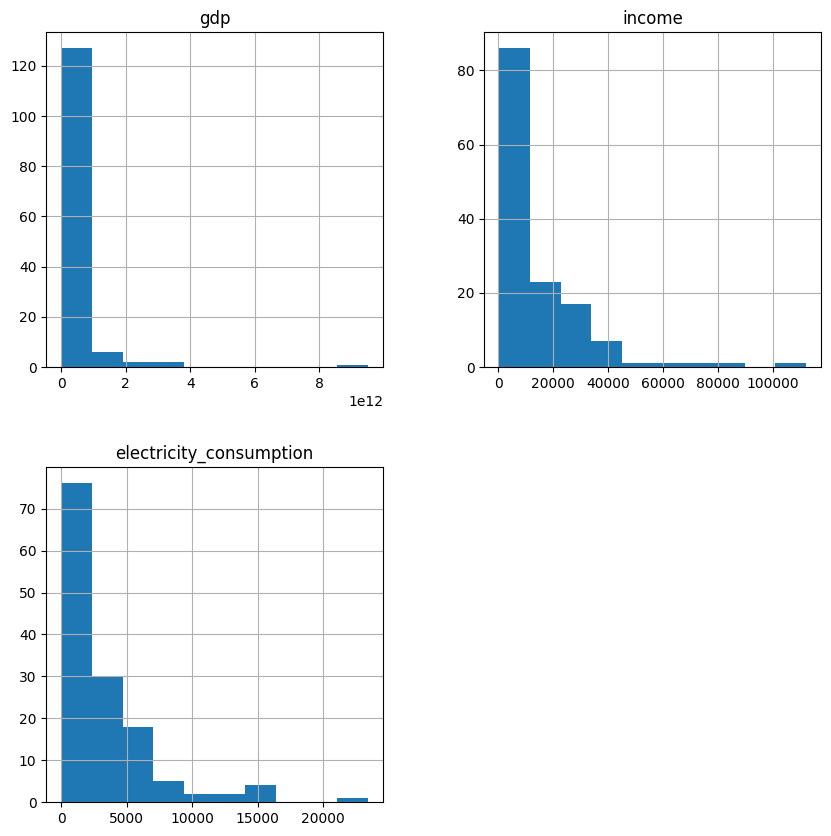

In [33]:
# Histogram for ALL the data in the year 1965
df[df['year'] == '1990'].hist(figsize=(10,10));

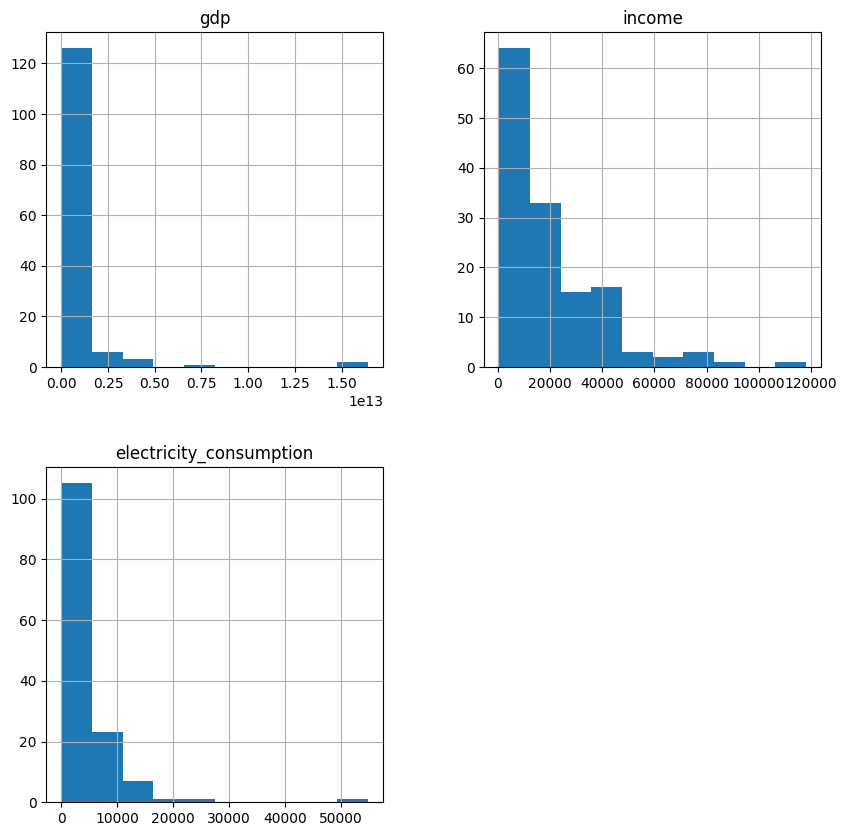

In [34]:
# Histogram for ALL the data in the year 2013
df[df['year'] == '2013'].hist(figsize=(10,10));

In [18]:
# first three quartiles for year 1990 and 2013
df[df['year'] == '1990'].quantile([0.25,0.5,0.75])

,gdp,income,electricity_consumption
0.25,2.077500e+10,3622.5,362.75
0.50,6.015000e+10,8645.0,1385.00
0.75,2.497500e+11,20150.0,4307.50


In [19]:
df[df['year'] == '2013'].quantile([0.25,0.5,0.75])

,gdp,income,electricity_consumption
0.25,3.687500e+10,5477.5,766.5
0.50,1.390000e+11,14400.0,2505.0
0.75,4.550000e+11,28200.0,5395.0


## Exploratory Data Analysis(EDA)

### we would like to answer three main questions which are:
1. Have certain countries of the world been growing in the selected metrics better than others ?
2. How has income growth differed between the two major developing economies, China and India ?
3. Correlation between rising per capita income levels and electricity usage per person ?

### Explored the economic growth in China, India, Japan and comparing it with United States within year 1965 and 2013 would help give us a better understanding and provide answers to the questions above.

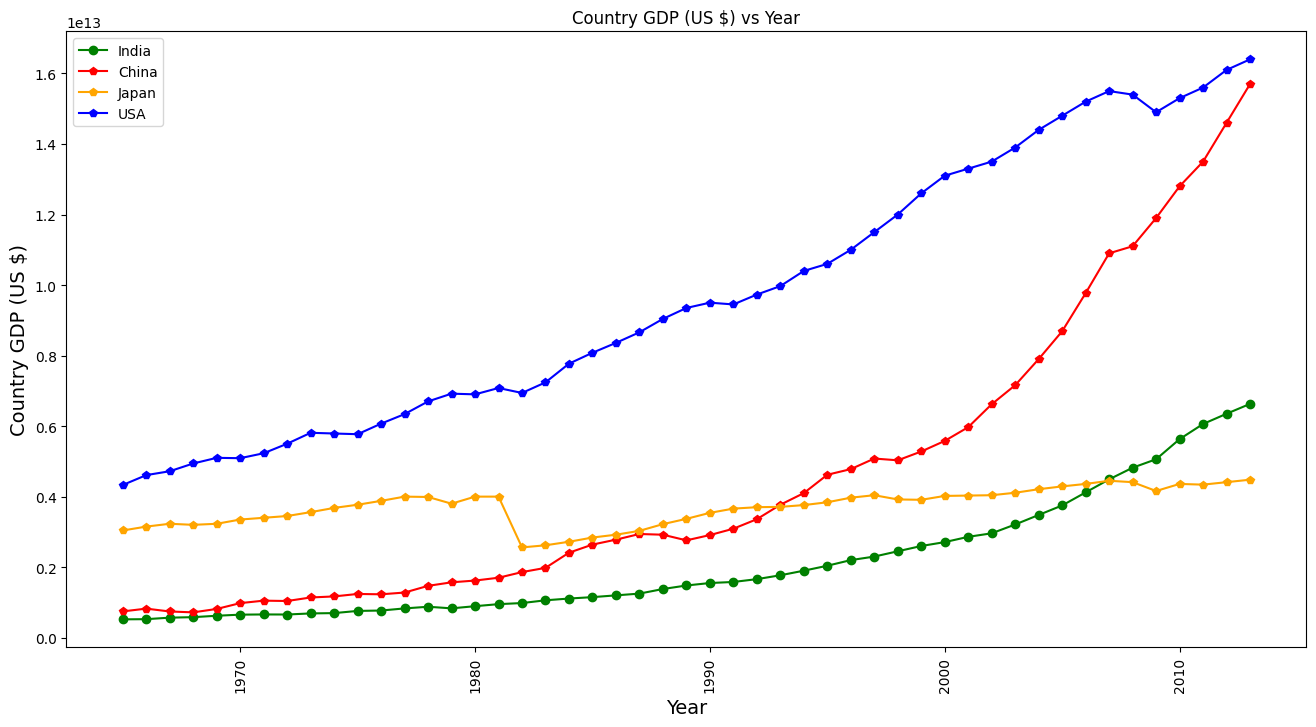

,country,year,gdp,income,electricity_consumption
9109,United States,2009,1.490000e+13,48600.0,12900.0


In [31]:
# Set Matplotlib Figure Size
plt.rcParams["figure.figsize"] = (16,8)

# Countries for comparison
india = df.query('country == "India" & year >= "1965"')
china = df.query('country == "China" & year >= "1965"')
japan = df.query('country == "Japan" & year >= "1965"')
usa = df.query('country == "United States" & year >= "1965"')


country_labels = ['India', 'China', 'Japan', 'USA']
year = np.arange(1965, 2014)

plt.plot(year, india.gdp, color='green', marker='o')
plt.plot(year, china.gdp, color='red', marker='p')
plt.plot(year, japan.gdp, color='orange', marker='p')
plt.plot(year, usa.gdp, color='blue', marker='p')

plt.title("Country GDP (US $) vs Year")
plt.xlabel("Year", fontsize=14)
plt.xticks(rotation=90)
plt.ylabel("Country GDP (US $)", fontsize=14)
plt.legend(country_labels)

plt.show()

df.query('country == "United States" & year == "2009"')

### The graph above shows the economic performance between four countries in the data between 1965 to 2013

**Japan:**
- Around 1965, Japan's economy was 70.2% of the US economy.
- Experienced a drop in 1982 due to an Asset Price Bubble.
- Went through the Lost Decade from 1991 to 2001.
- Economy didn't recover until 2000, reaching around $4 trillion.

**China and India:**
- China and India had similar economic performance till 1980.
- China's reforms in 1978 led to faster growth.
- China surpassed India's GDP by 1985, doubling it.
- China became 2nd largest economy in PPP by 1993.
- China's growth accelerated after joining WTO in 2001.
- India matched China's 2002 economy in 2013, 11 years later.

**United States:**
- US remained the largest economy from 1965 to 2013.
- 9/11 attacks didn't impact economy, but 2007-2009 Global Financial Crisis caused a 3.87% GDP contraction.
- Economy dropped from $ 15.5 to $ 14.9 trillion.
- US recovered pre-recession levels by 2011.

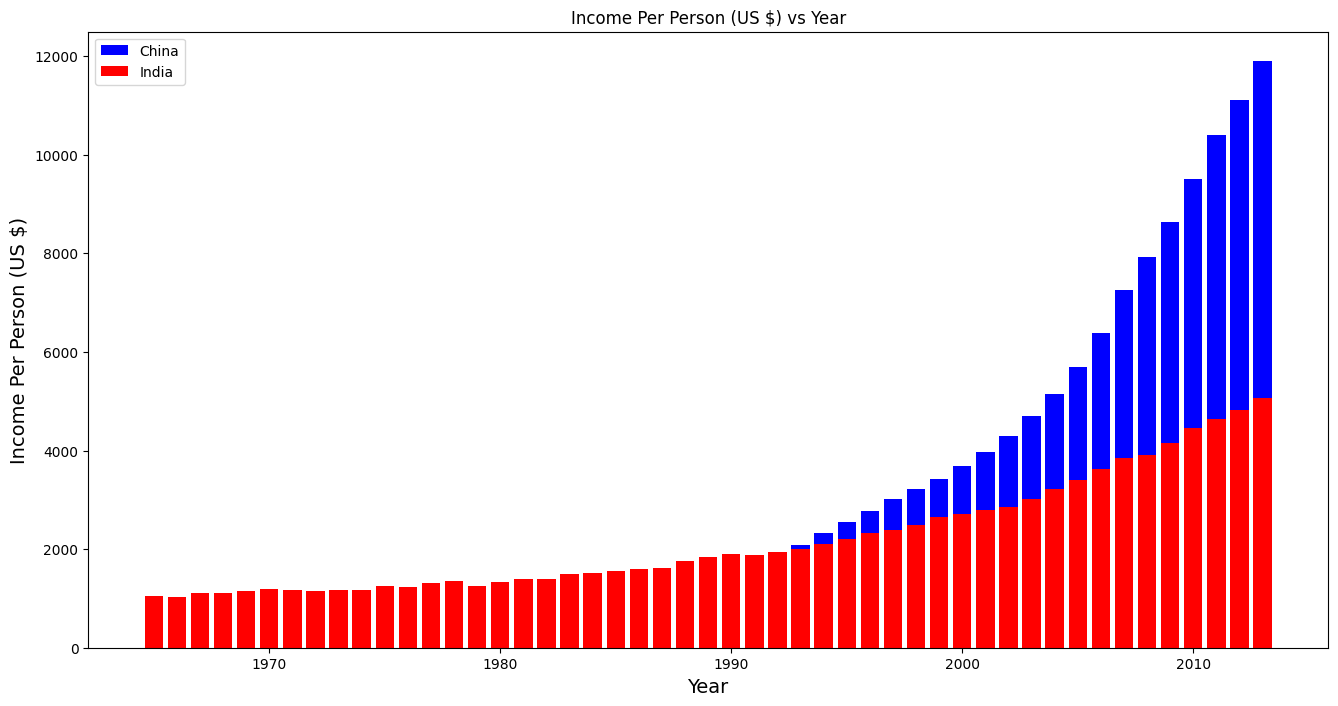

In [33]:
# Countries for comparison
india = df.query('country == "India" & year >= "1965"')
china = df.query('country == "China" & year >= "1965"')

country_labels = ['China', 'India']
year = np.arange(1965, 2014)

plt.bar(year, china.income, color='blue')
plt.bar(year, india.income, color='red')

plt.title("Income Per Person (US $) vs Year")
plt.xlabel("Year", fontsize=14)

plt.ylabel("Income Per Person (US $)", fontsize=14)
plt.legend(country_labels)

plt.show()

Based on the bar graph above, both China and India shows a positive trend in the rise of income levels, this is consistent with the exponential growth in the economies of both nations.

From 1965 to 1992, people in India were better off financially than those in China. But from 1993 onwards, China's income per person became much higher than India's. This shows that China's economy grew faster than India's during this time.

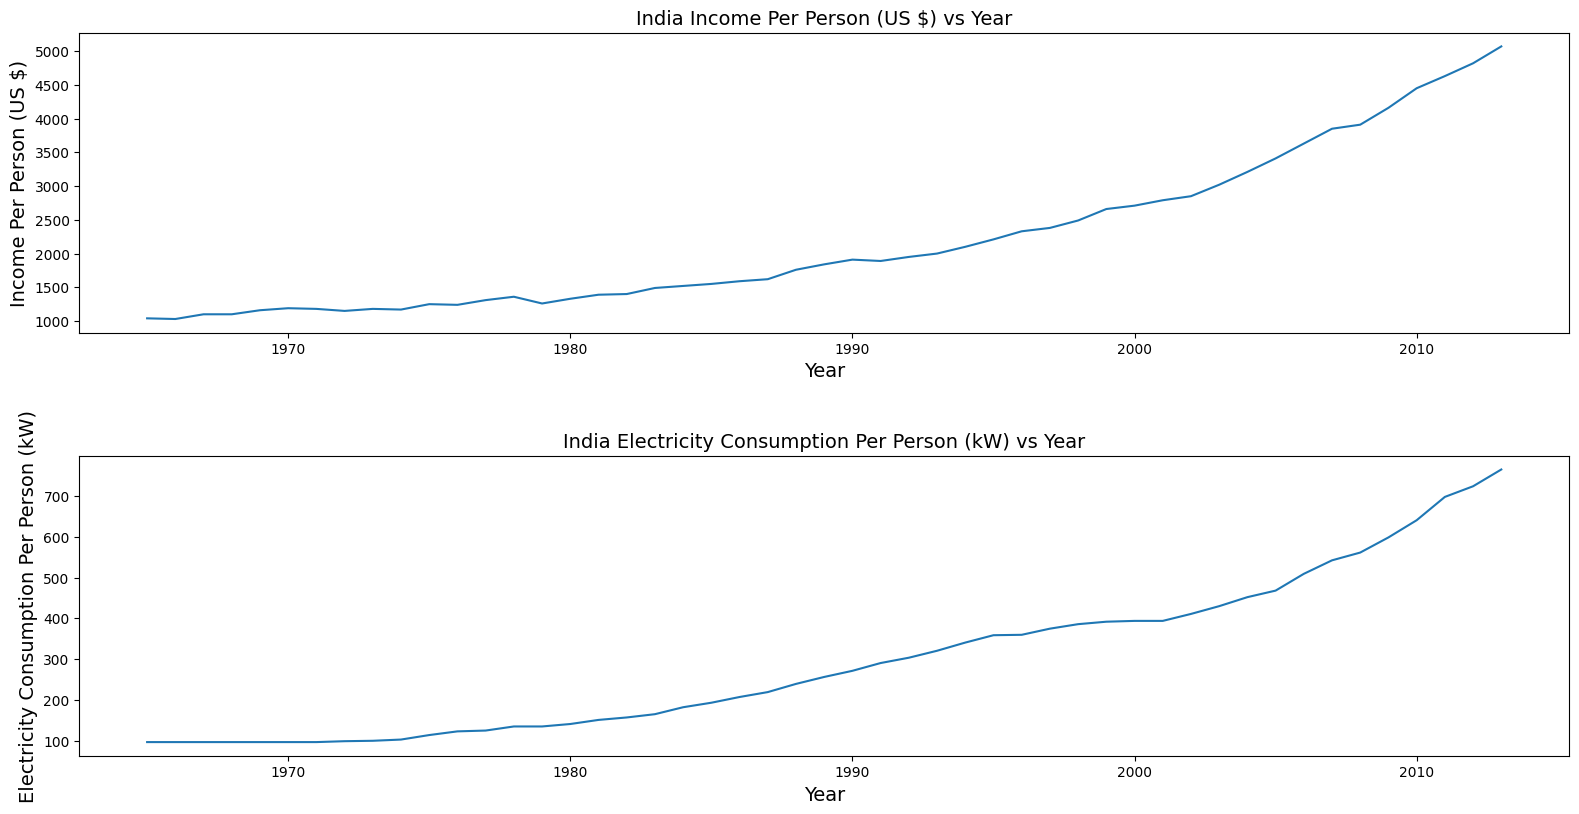

In [43]:
fig, a = plt.subplots(2)

#  x-axis
x = np.arange(1965, 2014)
# Define attributes for the first subplot
a[0].plot(x, india.income)
a[0].set_title("India Income Per Person (US $) vs Year", fontsize=14)
a[0].set_xlabel("Year", fontsize=14)
a[0].set_ylabel("Income Per Person (US $)", fontsize=14)

# Add spacing between subplots
fig.tight_layout(h_pad=5)

# Define attributes for the second subplot
a[1].plot(x, india.electricity_consumption)
a[1].set_title("India Electricity Consumption Per Person (kW) vs Year", fontsize=14)
a[1].set_xlabel("Year", fontsize=14)
a[1].set_ylabel("Electricity Consumption Per Person (kW)", fontsize=14)

plt.show()

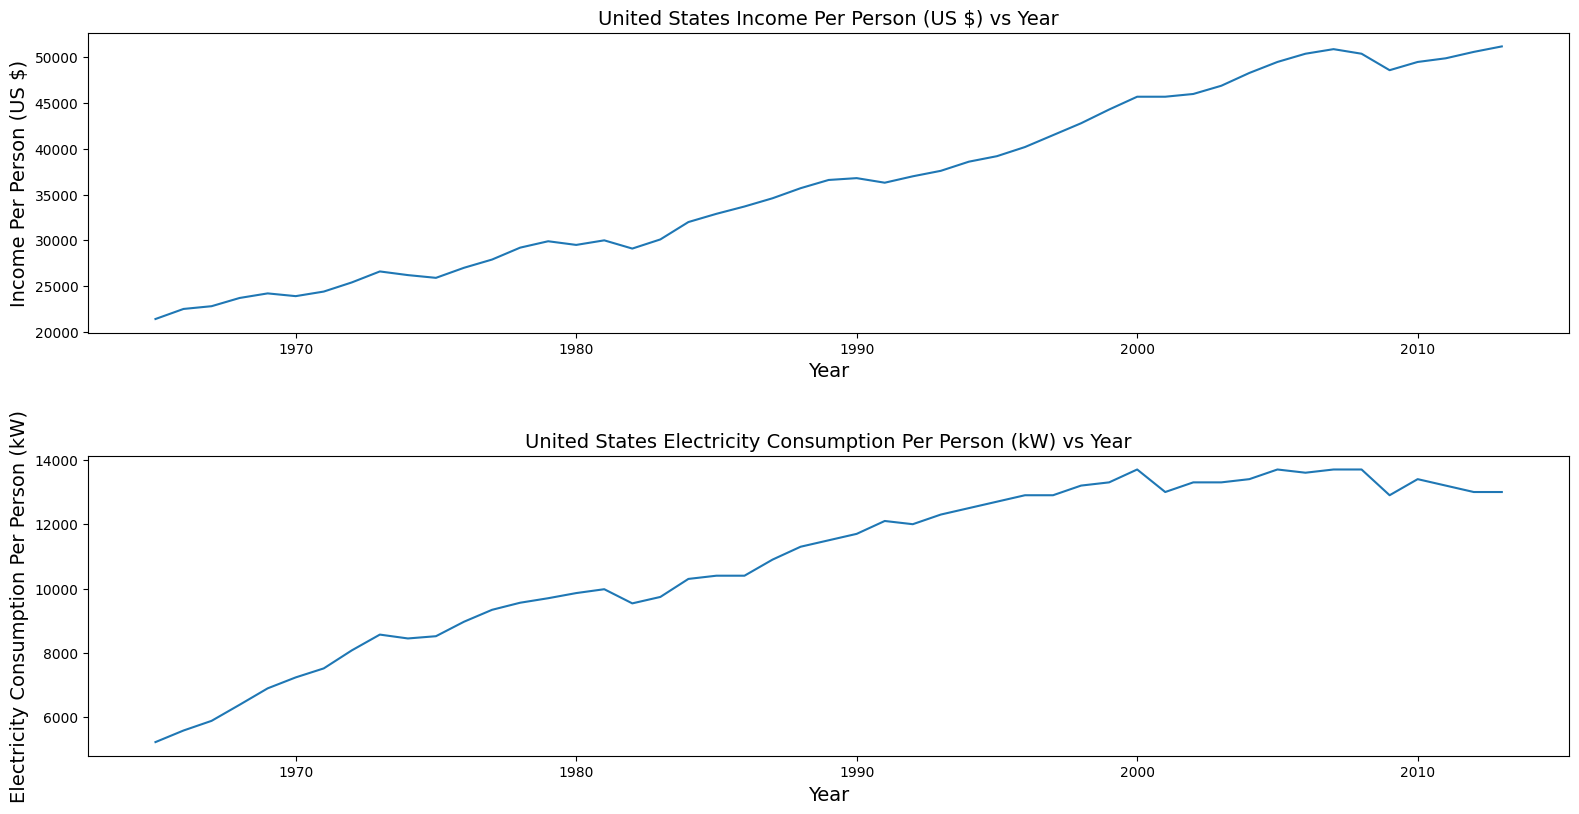

In [44]:
fig, a = plt.subplots(2)

#  x-axis
x = np.arange(1965, 2014)
# Define attributes for the first subplot
a[0].plot(x, usa.income)
a[0].set_title("United States Income Per Person (US $) vs Year", fontsize=14)
a[0].set_xlabel("Year", fontsize=14)
a[0].set_ylabel("Income Per Person (US $)", fontsize=14)

# Add spacing between subplots
fig.tight_layout(h_pad=5)

# Define attributes for the second subplot
a[1].plot(x, usa.electricity_consumption)
a[1].set_title("United States Electricity Consumption Per Person (kW) vs Year", fontsize=14)
a[1].set_xlabel("Year", fontsize=14)
a[1].set_ylabel("Electricity Consumption Per Person (kW)", fontsize=14)

plt.show()

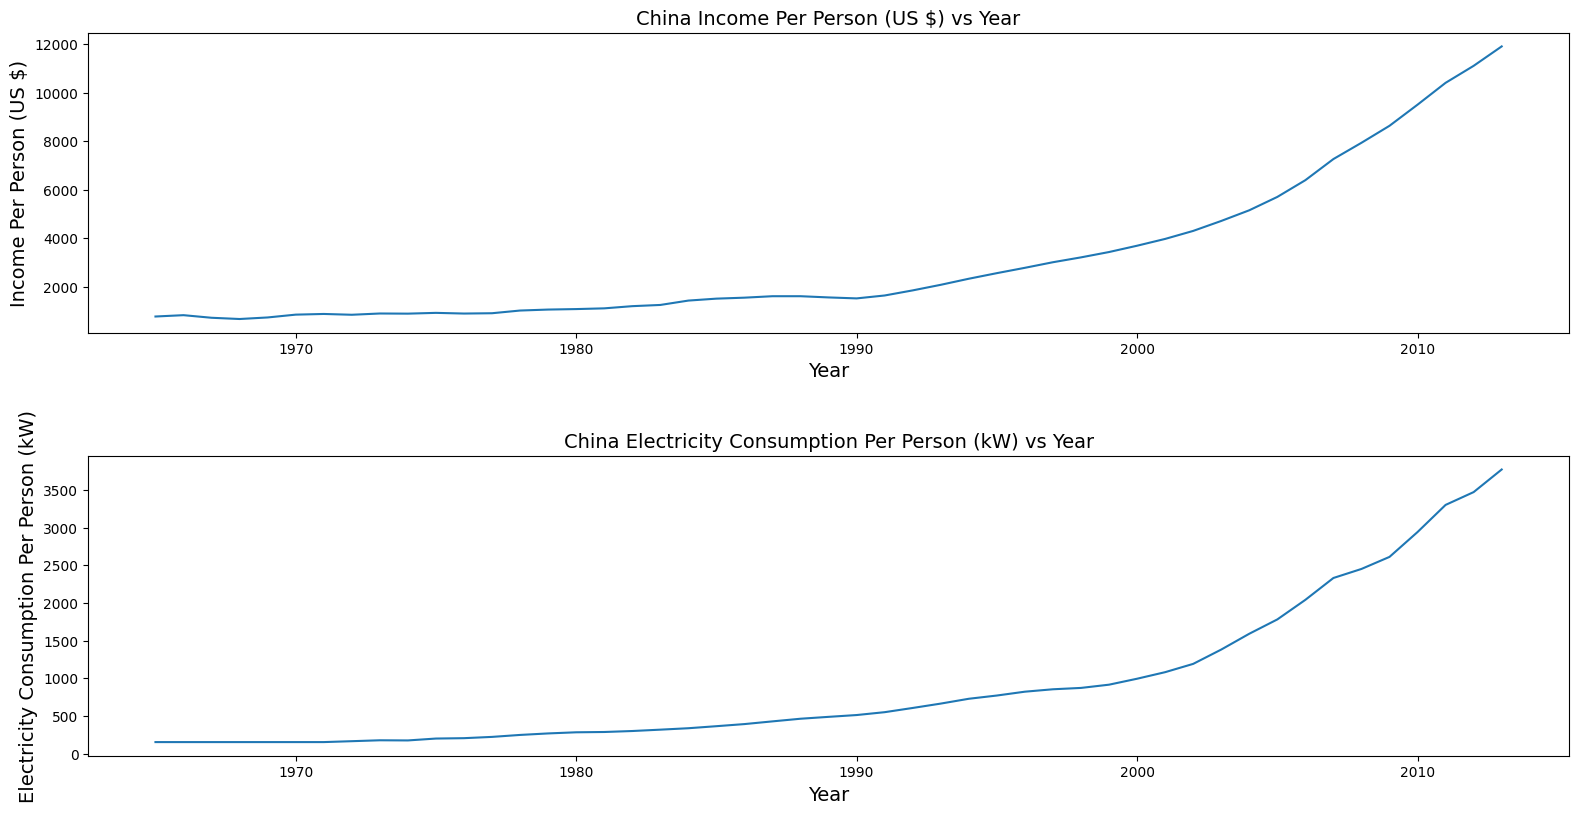

In [45]:
fig, a = plt.subplots(2)

# Define the x-axis
x = np.arange(1965, 2014)
# Define attributes for the first subplot
a[0].plot(x, china.income)
a[0].set_title("China Income Per Person (US $) vs Year", fontsize=14)
a[0].set_xlabel("Year", fontsize=14)
a[0].set_ylabel("Income Per Person (US $)", fontsize=14)

# Add spacing between subplots
fig.tight_layout(h_pad=5)

# Define attributes for the second subplot
a[1].plot(x, china.electricity_consumption)
a[1].set_title("China Electricity Consumption Per Person (kW) vs Year", fontsize=14)
a[1].set_xlabel("Year", fontsize=14)
a[1].set_ylabel("Electricity Consumption Per Person (kW)", fontsize=14)

plt.show()

The graph shows that when income goes up, electricity consumption also goes up. This suggests that higher income might lead people to buy more things, which in turn increases their use of electricity.

## Limitations
There were a few limitations in the analysis, such as:
- 1) The analysis focused on Electricity Consumption, Income, and GDP.

- 2) More variables like Cellphones, Internet use, and Oil consumption were planned but lacked enough data.

- 3) No Continent info prevented continent-based analysis .

- 4) Population data missing, so couldn't compare oil use and population growth.